In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [2]:
lyrics_df = pd.read_csv('./data/5-OUTPUT-lyric-lines-with-x-y-coords.csv')
lyrics_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal,x,y
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97,12.059131,3.228733
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97,10.122324,-0.534963
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97,14.267114,4.567685
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97,11.427492,10.538670
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97,8.454457,3.356438
...,...,...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41,6.037253,5.567401
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41,7.246043,6.227335
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41,7.309855,4.758282
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41,10.711868,4.561427


# Normalize continuous fields (so we can animate between them)

In [3]:
def normalize(s, upper_bound=100): # lower bound is 1
    return upper_bound * ((s - s.min()) / (s.max() - s.min()))

def normalize_x_and_y(data):
    temp = data.copy().dropna()
    temp['x'] = normalize(temp.x)
    temp['y'] = normalize(temp.y)
    NUM_DECIMALS = 6 # aka no rounding
    temp['x'] = temp['x'].round(NUM_DECIMALS)
    temp['y'] = temp['y'].round(NUM_DECIMALS)
    return temp

In [4]:
normalized_df = normalize_x_and_y(lyrics_df)
normalized_df['chart_debut_date_normalized_0_to_1'] = normalize(
    normalized_df.chart_debut_date_as_a_decimal
).round(3)
normalized_df = normalized_df.drop(columns=['chart_debut_date_as_a_decimal'])
normalized_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450
...,...,...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562


<AxesSubplot:xlabel='x', ylabel='y'>

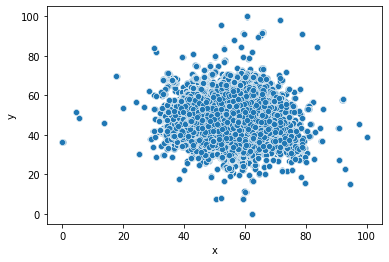

In [5]:
sns.scatterplot(
    data=normalized_df,
    x='x', y='y'
)

# Add an ID field

In [6]:
normalized_df['song_id'] = normalized_df.song + normalized_df.performer
normalized_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450
...,...,...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562


# Add "categorical bands" for genre

In [7]:
genres_sorted_by_count = normalized_df.generic_genre.value_counts().index
genres_sorted_by_count

Index(['POP', 'ROCK', 'HIP_HOP', 'JAZZ_INFLUENCED', 'UNCATEGORIZED', 'ELECTRO',
       'COUNTRY', 'FUNK', 'LATIN', 'FOLK', 'REGGAE'],
      dtype='object')

In [8]:
normalized_df['genre_position_band'] = normalize(
    normalized_df.generic_genre.replace(
        genres_sorted_by_count, # so it's SORTED BY MOST POPULAR
        range(0, len(genres_sorted_by_count))
    ).fillna(0).astype(int) # to be safe
)
normalized_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450,10.0
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450,10.0
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450,10.0
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450,10.0
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450,10.0
...,...,...,...,...,...,...,...,...,...,...
167355,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562,20.0
167356,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562,20.0
167357,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562,20.0
167358,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562,20.0


In [13]:
normalized_df.x.max()

100.0

<AxesSubplot:>

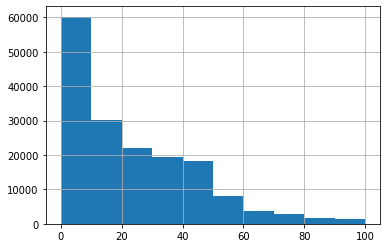

In [9]:
normalized_df.genre_position_band.hist()

# Export!

In [10]:
normalized_df.to_csv('./data/7-OUTPUT-lyric-lines-quadfeather-ready.csv', index=False)